## Data Preprocessing


In [43]:
from sklearn.datasets import load_digits
import pandas as pd

dataset = load_digits()
dir(dataset)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [44]:
dataset.data.shape

(1797, 64)

<Figure size 640x480 with 0 Axes>

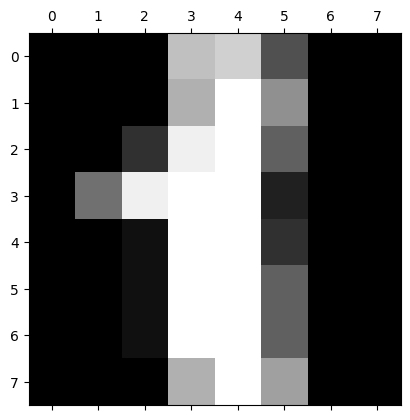

In [45]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.gray()
plt.matshow(dataset.data[1].reshape(8,8))
plt.show()

In [46]:
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [47]:
X = df
y = dataset.target

In [48]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ...,
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]], shape=(1797, 64))

## Model Train

In [49]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=30)

In [50]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9722222222222222

## PCA to reduce dimensions

In [51]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95) 
X_pca = pca.fit_transform(X_scaled)

In [52]:
X_pca.shape

(1797, 40)

In [53]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=30)
model = LogisticRegression(max_iter=10000)
model.fit(X_train_pca, y_train)
model.score(X_test_pca, y_test)

0.9638888888888889

In [54]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [55]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=30)
model = LogisticRegression(max_iter=10000)
model.fit(X_train_pca, y_train)
model.score(X_test_pca, y_test)

0.5666666666666667